In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import sam_model_registry, SamPredictor, SamAutomaticMaskGenerator

In [2]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0]['segmentation'].shape[0], sorted_anns[0]['segmentation'].shape[1], 4))
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann['segmentation']
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        img[m] = color_mask
    ax.imshow(img)

## Load model

In [341]:
sam_checkpoint = "./runs/241114_SAM_ViT_b_PROMPT_POINT_ft_v1/best.pth"
model_type = "vit_b"

device = "cuda"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)
mask_generator = SamAutomaticMaskGenerator(sam)

## Image

In [346]:
img_dir = r"D:\015_segmentation\Custom_SAM\AY_frames"
#img_dir = r"D:\000_Datasets\20.Water segmentation\DANU_WS_v1\test\images"
img_list = [os.path.join(img_dir,f) for f in os.listdir(img_dir) if f.endswith(".jpg")]

D:\015_segmentation\Custom_SAM\AY_frames\AY1610.jpg


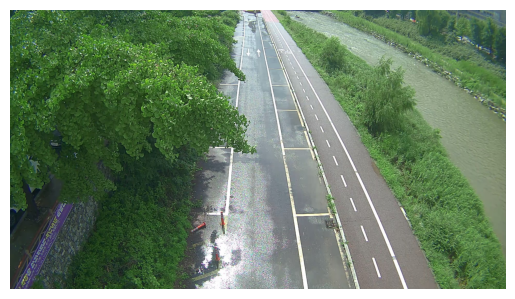

In [450]:
idx = -19 #9
img_path = img_list[idx]
print(img_path)
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img);

## Run without prompt

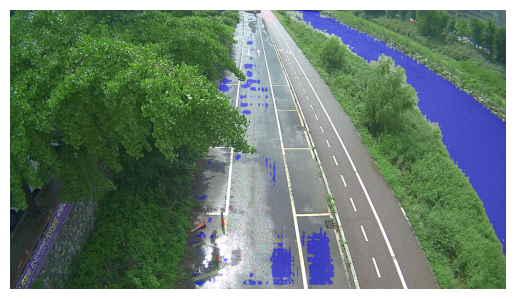

In [451]:
predictor.set_image(img)

masks, scores, logits = predictor.predict(
    point_coords=None,
    point_labels=None,
    multimask_output=False,
)

binary_mask = (masks[0, :, :] > 0.0).astype(np.float32)

seg_img = img.copy()
seg_img[binary_mask==1] = (0,0,255)
transparent_img = cv2.addWeighted(img,0.5,seg_img,0.5,1.0)
plt.axis('off')
plt.imshow(transparent_img);

## Prompt

In [410]:
COLOR = (255,0,0)
#RED = (255,255,0)

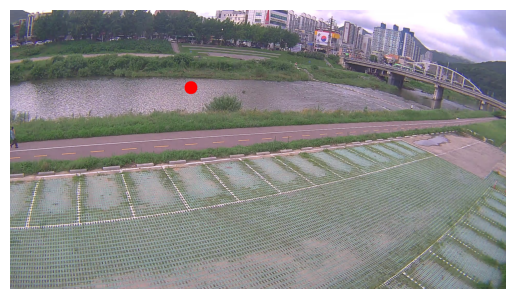

In [415]:
img2 = np.copy(img)
pt1 = (700,300)
pt_list = [pt1]
for pt in pt_list:
    img2 = cv2.line(img2, pt, pt, COLOR, 50)
plt.axis('off')
plt.imshow(img2)

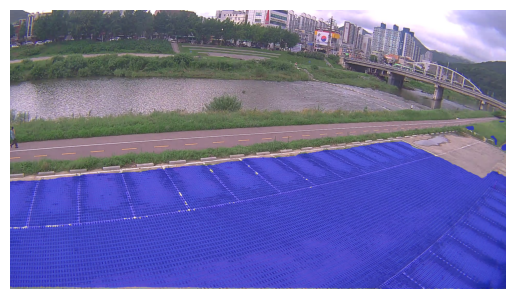

In [416]:
input_point = np.array(pt_list)
input_label = np.ones(len(input_point))

predictor.set_image(img)

masks, scores, logits = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=False,
)

binary_mask = (masks[0, :, :] > 0.5).astype(np.float32)

seg_img = img.copy()
seg_img[binary_mask==1] = (0,0,255)
transparent_img = cv2.addWeighted(img,0.5,seg_img,0.5,1.0)
plt.axis('off')
plt.imshow(transparent_img)

In [115]:
plt.close()